In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm


pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('datasets/facebook_posts.csv')
df.head(3)


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/facebook_posts.csv'

In [ ]:
df.describe()


,Post ID,Account ID,Account username,Account name,Duration (sec),Data comment,Impressions,Reach,Shares,Plays,Likes,Comments,Saves,Follows,Page ID,Is crosspost,Is share,Languages,Custom labels,Funded content status,3-second video views,1-minute video views,3-Second viewers,1-minute viewers,3-second video views from Boosted posts,3-second video views from Organic posts,"Reactions, Comments and Shares",Reactions,Seconds viewed,Average Seconds viewed,Estimated earnings (USD),Ad CPM (USD),Ad impressions,Total clicks,Other Clicks,Link Clicks,Matched Audience Targeting Consumption (Photo Click),Matched Audience Targeting Consumption (Video Click),Negative feedback from users: Hide all,Negative feedback from users: Hide,Impressions from Unpaid posts,Impressions from Boosted posts,Reach from Organic posts,Reach from Boosted posts,Engaged users,Negative feedback from users,Unique negative feedback from users,Unique negative feedback from users: Hide all,Unique negative feedback from users: Hide,REELS_PLAYS:COUNT
count,7.556000e+03,0.0,0.0,0.0,7556.000000,0.0,69.000000,69.000000,432.000000,0.0,0.0,432.000000,0.0,0.0,7.556000e+03,7556.0,7556.0,0.0,0.0,0.0,7505.000000,7505.0,7505.000000,7505.0,7505.0,7505.000000,432.000000,432.000000,3.810000e+02,381.000000,381.0,364.0,381.0,69.000000,44.000000,9.000000,41.000000,1.0,5.000000,3.0,18.000000,18.0,18.000000,18.0,18.000000,18.000000,18.000000,2.000000,2.0,1.700000e+01
mean,3.450325e+15,NaN,NaN,NaN,1.199047,NaN,14155.971014,14002.391304,5.136574,NaN,NaN,1.201389,NaN,NaN,1.150548e+14,0.0,0.0,NaN,NaN,NaN,0.127781,0.0,0.123384,0.0,0.0,0.127781,106.354167,100.016204,2.172976e+04,5.539483,0.0,0.0,0.0,33.000000,20.954545,4.000000,31.463415,29.0,1.400000,1.0,1115.111111,0.0,1048.000000,0.0,55.166667,0.277778,0.277778,1.500000,1.0,8.402059e+04
std,2.242668e+15,NaN,NaN,NaN,5.813431,NaN,94648.525500,93824.907668,80.131894,NaN,NaN,8.485210,NaN,NaN,1.178541e+13,0.0,0.0,NaN,NaN,NaN,3.054595,0.0,2.927831,0.0,0.0,3.054595,1825.231367,1738.235669,3.702775e+05,9.340757,0.0,0.0,0.0,51.112621,24.199706,3.316625,42.223274,NaN,0.547723,0.0,1027.599710,0.0,966.445032,0.0,70.440004,0.574513,0.574513,0.707107,0.0,3.039689e+05
min,4.574330e+14,NaN,NaN,NaN,0.000000,NaN,58.000000,57.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.000640e+14,0.0,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,29.0,1.000000,1.0,186.000000,0.0,168.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.0,1.983000e+03
25%,6.318500e+14,NaN,NaN,NaN,0.000000,NaN,567.000000,521.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.000640e+14,0.0,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,3.750000,1.000000,8.000000,29.0,1.000000,1.0,312.500000,0.0,281.250000,0.0,7.500000,0.000000,0.000000,1.250000,1.0,4.160000e+03
50%,4.987740e+15,NaN,NaN,NaN,0.000000,NaN,1302.000000,1245.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.243190e+14,0.0,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.701000e+00,1.710000,0.0,0.0,0.0,12.000000,13.500000,4.000000,16.000000,29.0,1.000000,1.0,856.500000,0.0,806.000000,0.0,19.500000,0.000000,0.000000,1.500000,1.0,4.707000e+03
75%,5.248240e+15,NaN,NaN,NaN,0.000000,NaN,2858.000000,2704.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.243190e+14,0.0,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.494400e+01,8.261000,0.0,0.0,0.0,47.000000,26.750000,5.000000,38.000000,29.0,2.000000,1.0,1534.000000,0.0,1479.750000,0.0,81.000000,0.000000,0.000000,1.750000,1.0,7.047000e+03
max,5.558590e+15,NaN,NaN,NaN,57.000000,NaN,786251.000000,779330.000000,1647.000000,NaN,NaN,143.000000,NaN,NaN,1.243190e+14,0.0,0.0,NaN,NaN,NaN,229.000000,0.0,218.000000,0.0,0.0,229.000000,37792.000000,36002.000000,7.212360e+06,109.239000,0.0,0.0,0.0,297.000000,109.000000,9.000000,227.000000,29.0,2.000000,1.0,4185.000000,0.0,3934.000000,0.0,257.000000,2.000000,2.000000,2.000000

In [ ]:

df.loc[:,['Impressions', 'Permalink']].sort_values('Impressions', ascending=False).head(5).values


array([[786251.0, 'https://www.facebook.com/reel/1617457972331927/'],
       [65997.0, 'https://www.facebook.com/reel/1588009561736898/'],
       [6422.0, 'https://www.facebook.com/reel/1119885409008987/'],
       [6149.0, 'https://www.facebook.com/reel/636447371832577/'],
       [5762.0, 'https://www.facebook.com/reel/271438492552264/']],
      dtype=object)

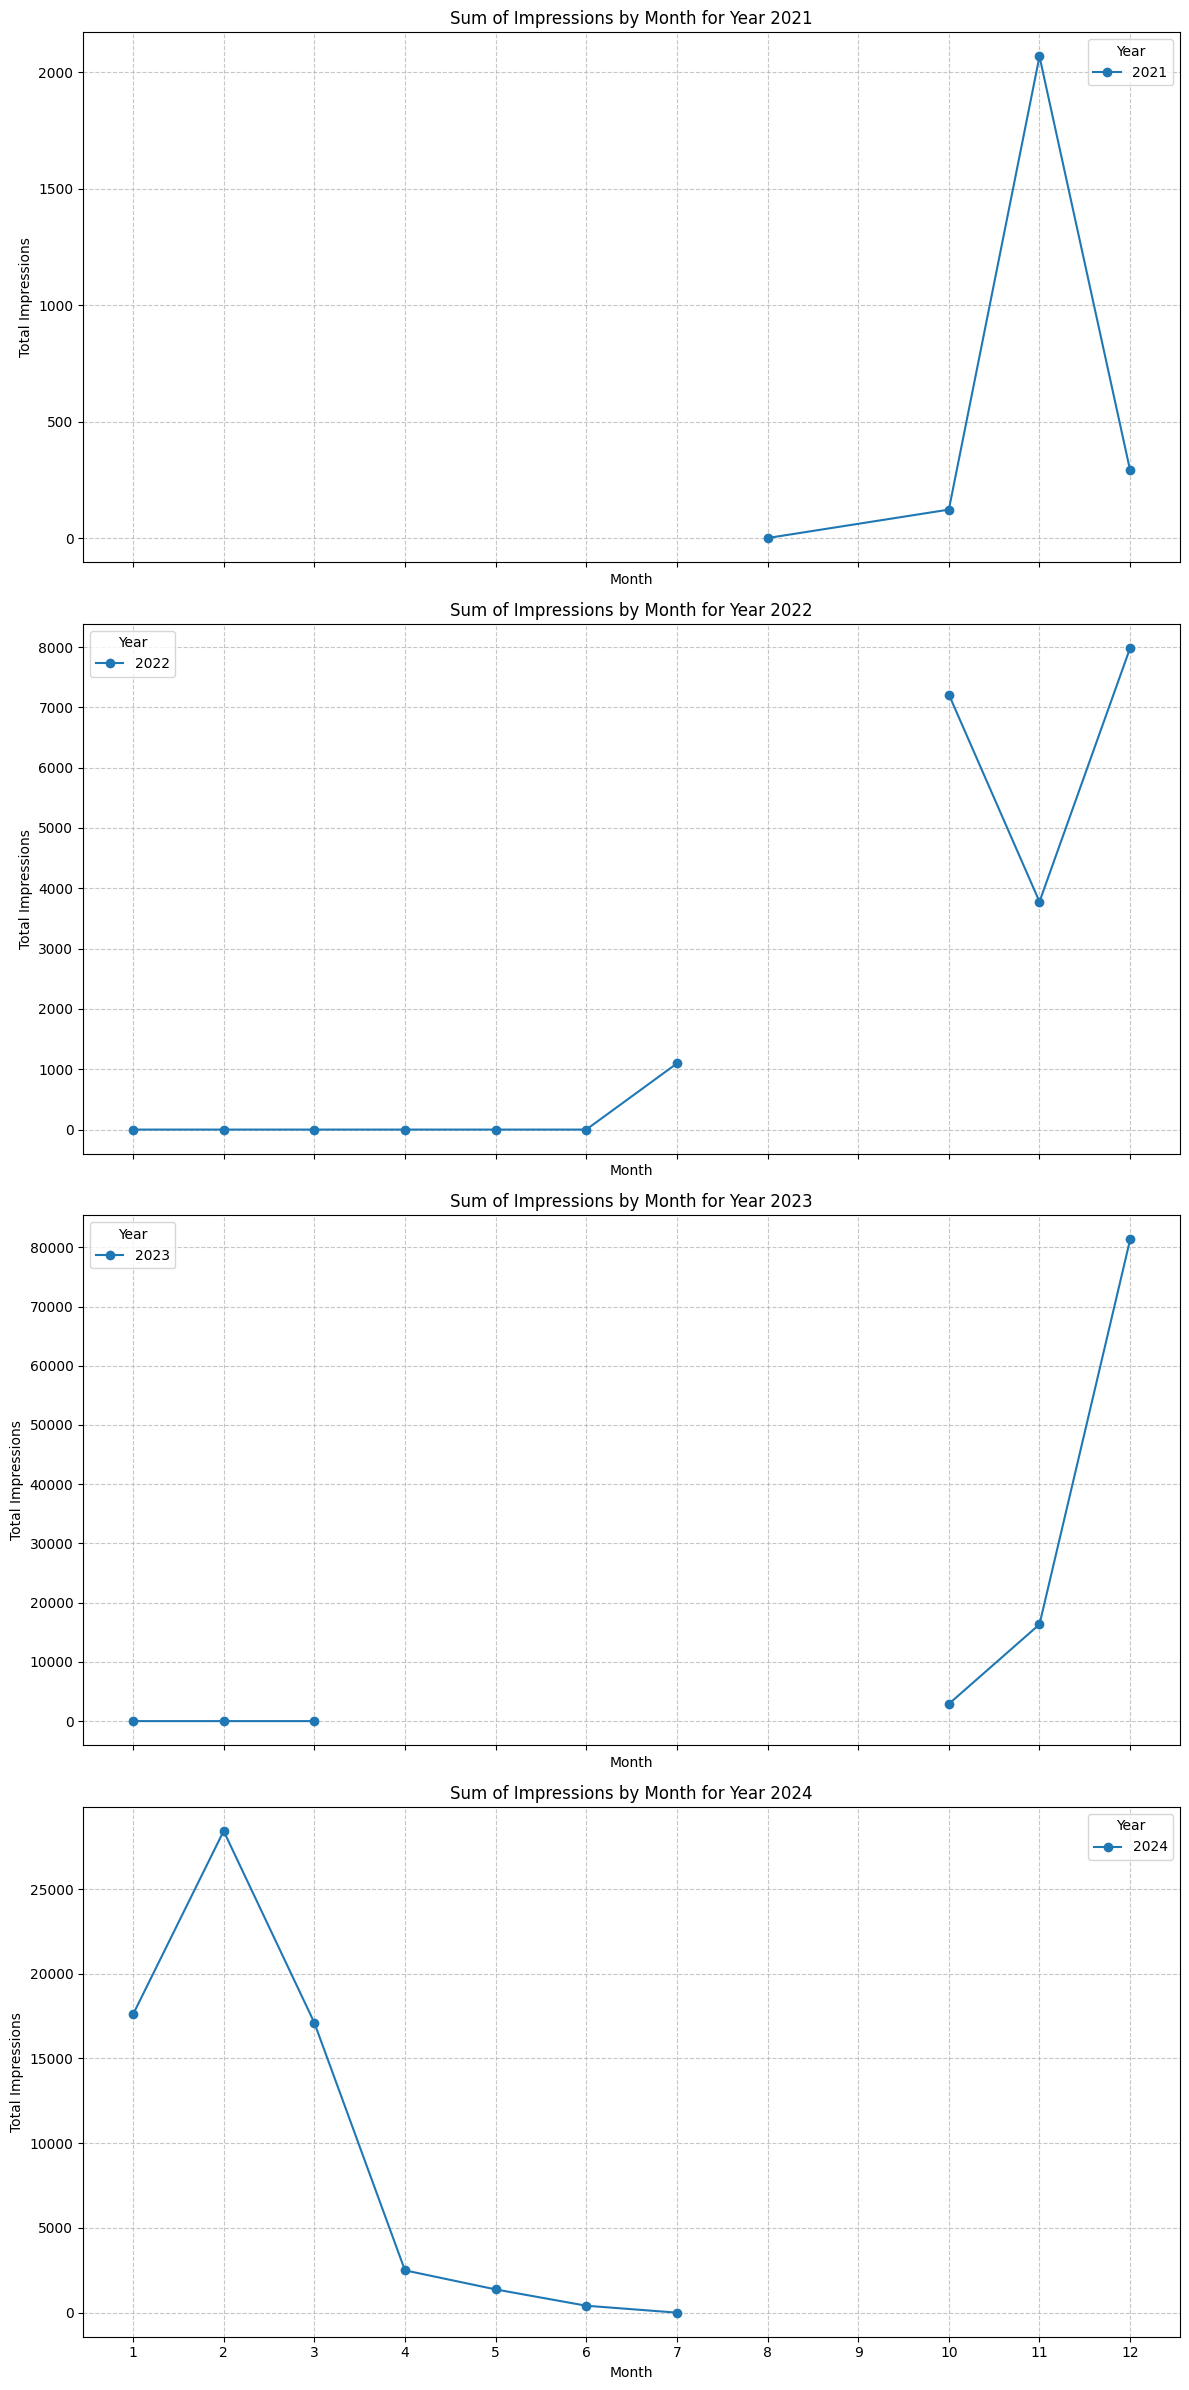

In [ ]:
# Convert 'Publish time' to datetime
df['Publish time'] = pd.to_datetime(df['Publish time'], format='%d/%m/%Y %H:%M')

# Extract year and month from 'Publish time'
df['Year'] = df['Publish time'].dt.year
df['Month'] = df['Publish time'].dt.month

# Group by Year and Month, sum the impressions
impressions_by_month = df[df.index != 7433].groupby(['Year', 'Month'])['Impressions'].sum().reset_index()

# Create a pivot table for easier plotting
pivot_impressions = impressions_by_month.pivot(index='Month', columns='Year', values='Impressions')

# Create separate plots for each year
years = pivot_impressions.columns
num_years = len(years)
fig, axs = plt.subplots(num_years, 1, figsize=(12, 6*num_years), sharex=True)

for i, year in enumerate(years):
    axs[i].plot(pivot_impressions.index, pivot_impressions[year], marker='o', label=year)
    axs[i].set_title(f'Sum of Impressions by Month for Year {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Impressions')
    axs[i].legend(title='Year')
    axs[i].set_xticks(range(1, 13))
    axs[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
dfi = pd.read_csv('datasets/instagram_posts.csv')
dfi.head(3)

,Post ID,Account ID,Account username,Account name,Description,Duration (sec),Publish time,Permalink,Post type,Data comment,Date,Impressions,Reach,Shares,Plays,Likes,Comments,Saves,Follows,Page ID,Page name,Title,Caption type,Is crosspost,Is share,Languages,Custom labels,Funded content status,3-second video views,1-minute video views,3-Second viewers,1-minute viewers,3-second video views from Boosted posts,3-second video views from Organic posts,"Reactions, Comments and Shares",Reactions,Seconds viewed,Average Seconds viewed,Estimated earnings (USD),Ad CPM (USD),Ad impressions,Total clicks,Other Clicks,Link Clicks,Matched Audience Targeting Consumption (Photo Click),Matched Audience Targeting Consumption (Video Click),Negative feedback from users: Hide all,Negative feedback from users: Hide,Impressions from Unpaid posts,Impressions from Boosted posts,Reach from Organic posts,Reach from Boosted posts,Engaged users,Negative feedback from users,Unique negative feedback from users,Unique negative feedback from users: Hide all,Unique negative feedback from users: Hide,REELS_PLAYS:COUNT
0,1.790000e+16,1.780000e+16,jeanpierreweillpaintings,3D Painting on Glass,S E P T E M B E R 1 7 T H \nO F F I C I A L ...,0,31/08/2021 3:08,https://www.instagram.com/p/CTPBazHD_nd/,IG image,NaN,Lifetime,145,138,2,NaN,37,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.790000e+16,1.780000e+16,jeanpierreweillpaintings,3D Painting on Glass,🌟🌟🌟It's here!🌟🌟🌟\nOur new Classique Collection...,0,18/09/2021 11:09,https://www.instagram.com/p/CT-UKu8IbBj/,IG image,NaN,Lifetime,98,95,0,NaN,36,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.800000e+16,1.780000e+16,jeanpierreweillpaintings,3D Painting on Glass,Petite and Minis ready at the Bezalel Fair in ...,7,24/09/2021 0:09,https://www.instagram.com/reel/CUMgFnVIEnP/,IG reel,NaN,Lifetime,874,837,0,2391.0,73,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfi['Publish time'] = pd.to_datetime(dfi['Publish time'], errors='coerce')
dfi['Year'] = dfi['Publish time'].dt.year
dfi['Month'] = dfi['Publish time'].dt.month

C:\Users\Vlad\AppData\Local\Temp\ipykernel_11836\3930097455.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfi['Publish time'] = pd.to_datetime(dfi['Publish time'], errors='coerce')


In [ ]:
dfi.loc[dfi['Year']==2021,['Year', 'Month', 'Impressions', 'Permalink']].sort_values('Impressions', ascending=False).head(5).values



array([[2021, 12, 5774,
        'https://www.instagram.com/jeanpierreweillpaintings/reel/CXjXjVojqjh/'],
       [2021, 10, 2668,
        'https://www.instagram.com/jeanpierreweillpaintings/p/CVPf8roI9yR/'],
       [2021, 11, 1321,
        'https://www.instagram.com/jeanpierreweillpaintings/reel/CWEXZjBDg7_/'],
       [2021, 12, 1039,
        'https://www.instagram.com/jeanpierreweillpaintings/reel/CYCknszF_Qq/'],
       [2021, 12, 993,
        'https://www.instagram.com/jeanpierreweillpaintings/reel/CXcJQ7-D5Zi/']],
      dtype=object)

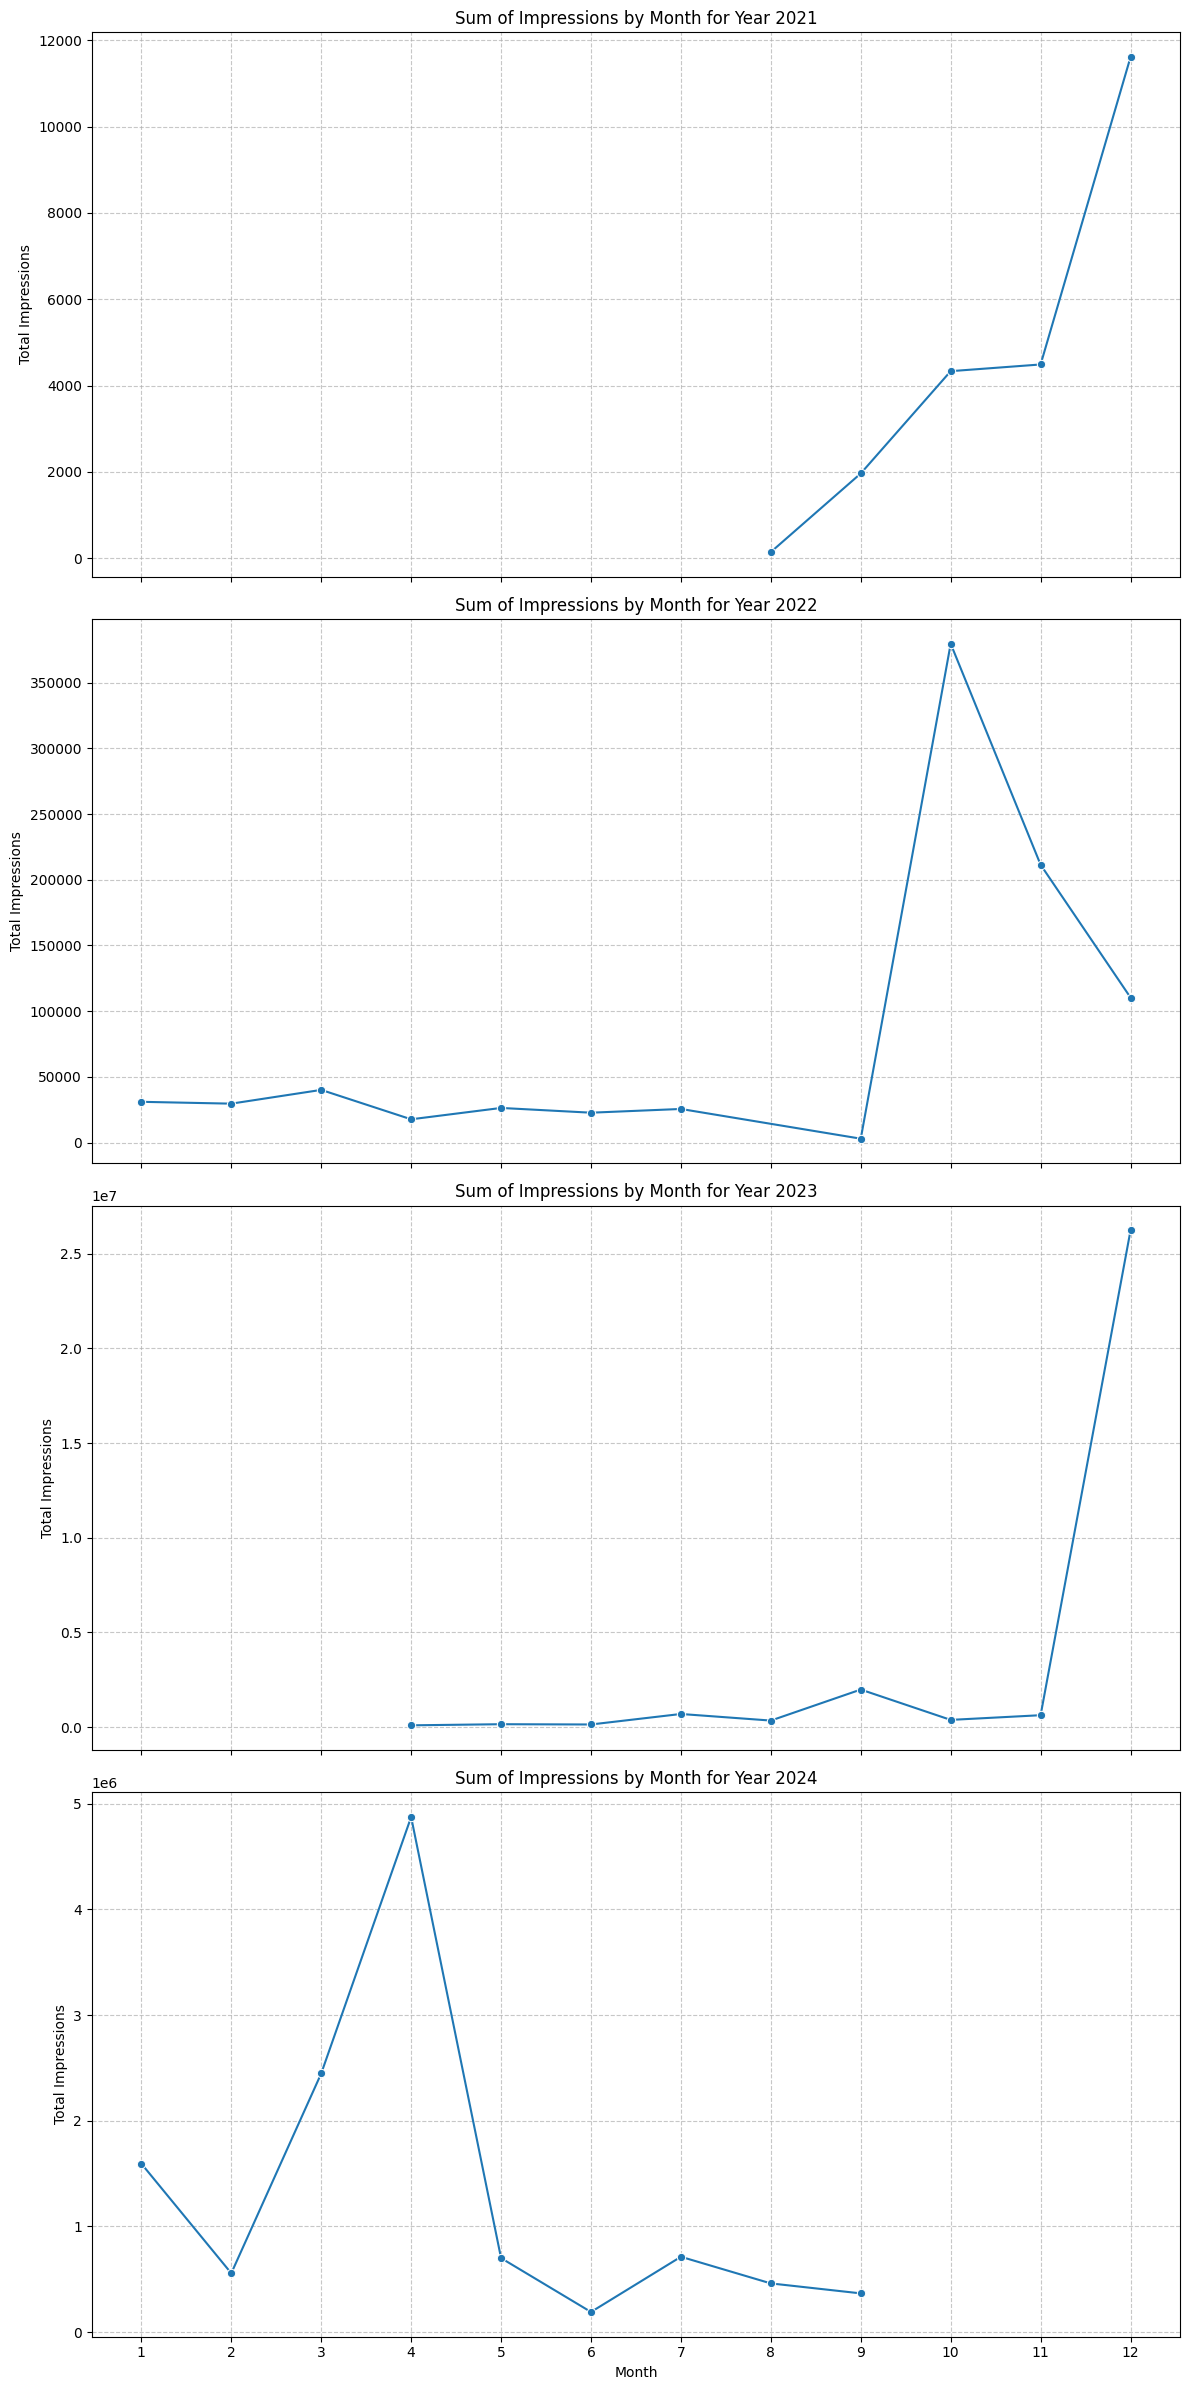

In [ ]:

# Group by Year and Month, sum the impressions
impressions_by_month = dfi.groupby(['Year', 'Month'])['Impressions'].sum().reset_index()

# Create separate plots for each year
years = impressions_by_month['Year'].unique()
num_years = len(years)
fig, axs = plt.subplots(num_years, 1, figsize=(12, 6*num_years), sharex=True)

for i, year in enumerate(years):
    year_data = impressions_by_month[impressions_by_month['Year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Impressions', marker='o', ax=axs[i])
    axs[i].set_title(f'Sum of Impressions by Month for Year {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Impressions')
    axs[i].set_xticks(range(1, 13))
    axs[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Group by Month, sum the impressions across all years
impressions_by_month = dfi.groupby('Month')['Impressions'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=impressions_by_month, x='Month', y='Impressions', marker='o')

plt.title('Sum of Impressions by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


NameError: name 'dfi' is not defined